In [1]:
# import dependencies for importing dependencies 
import torch
import transformers
from transformers import DonutProcessor

torch.__version__

c:\Users\bolth\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'2.4.0'

In [2]:
tokenizer = transformers.AutoTokenizer.from_pretrained('donut-demo')
model = transformers.AutoModelForVision2Seq.from_pretrained("donut-demo")

In [5]:
from PIL import Image # type: ignore
import requests
import matplotlib.pyplot as plt

In [3]:
# !pip install Pillow==10.4.0

In [97]:
processor = DonutProcessor.from_pretrained("donut-demo") # type: ignore

url = "https://help.kasirpintar.co.id/wp-content/uploads/2022/04/6.-tampilan-dari-cetak-struk.jpg"

image = Image.open(requests.get(url, stream=True).raw).convert("RGB") # type: ignore
image_from_local = Image.open('receipts/c-10.png').convert("RGB") # type: ignore
pixel_values = processor(image_from_local, return_tensors="pt").pixel_values

In [98]:
outputs = model.generate(pixel_values, max_length=512) # type: ignore

sequence = processor.decode(outputs[0], skip_special_tokens=True)
print(sequence) # type: ignore

<s_cord-v2><s_menu><s_nm> Mie Ayam Bakso</s_nm><s_cnt> 2</s_cnt><s_price> 74.000</s_price><sep/><s_nm> Nasi Gr Gila</s_nm><s_cnt> 1</s_cnt><s_price> 39.000</s_price><sep/><s_nm> Ayam Penyet</s_nm><s_cnt> 2</s_cnt><s_price> 82.000</s_price><sep/><s_nm> Crispy Chicken Steak</s_nm><s_cnt> 1</s_cnt><s_price> 45.000</s_price><sep/><s_nm> Extra Nasi Putih</s_nm><s_cnt> 1</s_cnt><s_price> 7.000</s_price><sep/><s_nm> Es Teh Manis</s_nm><s_cnt> 4</s_cnt><s_price> 40.000</s_price><sep/><s_nm> Es Campur</s_nm><s_cnt> 4</s_cnt><s_price> 82.000</s_price></s_menu><s_sub_total><s_subtotal_price> 378.000</s_subtotal_price><s_tax_price> 37.900</s_tax_price></s_sub_total><s_total><s_total_price> 416.900</s_total_price><s_creditcardprice> 416.900</s_creditcardprice><s_menuqty_cnt> 15</s_menuqty_cnt></s_total>


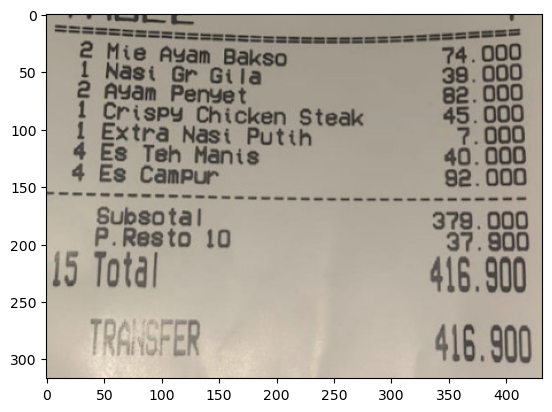

In [99]:
plt.imshow(image_from_local) # type: ignore

In [95]:
def normalize_number(number_str):
    # Handle cases where both comma and period are present in the number
    if ',' in number_str and '.' in number_str:
        # Remove periods, then replace commas with periods for decimal point
        number_str = number_str.replace('.', '').replace(',', '.')
    elif ',' in number_str:
        # Only commas present, remove them (thousand separator)
        number_str = number_str.replace(',', '')
    elif '.' in number_str:
        # Only periods present, remove them (thousand separator)
        number_str = number_str.replace('.', '')

    return float(number_str)  # Convert the cleaned string to float


In [100]:
import re
import json

def parse_receipt(text):
    # Regex patterns to extract data
    item_pattern = r"<s_nm>\s*(.*?)\s*</s_nm>(?:<s_unitprice>\s*([\d,\.]+)\s*</s_unitprice>)?<s_cnt>\s*(\d+)\s*(?:X)?\s*</s_cnt>(?:<s_discountprice>\s*([\d,\.\(\)]+)\s*</s_discountprice>)?<s_price>\s*(?:Rp\s*)?([\d,\.]+)\s*</s_price>"
    total_pattern = r"<s_subtotal_price>\s*:?[\s]*([\d,\.]+)\s*</s_subtotal_price>"
    a_total_pattern = r"<s_total_price>\s*:?[\s]*([\d,\.]+)\s*</s_total_price>"

    # Extract items
    items = re.findall(item_pattern, text)
    print(items)

    # Extract subtotal
    tax_match = re.search(r"<s_tax_price>\s*:?[\s]*([\d,\.]+)\s*</s_tax_price>", text)
    cash_match = re.search(r"<s_cashprice>\s*:?[\s]*([\d,\.]+)\s*</s_cashprice>", text)
    tax = normalize_number(tax_match.group(1)) if tax_match else None
    cash = normalize_number(cash_match.group(1)) if cash_match else None
    total_match = re.search(a_total_pattern, text)
    subtotal_match = re.search(total_pattern, text)
    total = normalize_number(total_match.group(1))
    subtotal = normalize_number(subtotal_match.group(1))

    # Create a structured dictionary
    receipt = {
        "items": [
            {
                "name": name.strip(),
                "unit_price": float(unit_price.replace('.', '').replace(',', '.')) if unit_price else None, # type: ignore
                "count": int(count), # type: ignore
                "discount_price": float(discount_price.replace('(', '').replace(')', '')) if discount_price else None,
                "price": float(normalize_number(price)) # type: ignore
            }
            for name, unit_price, count, discount_price,price in items
        ],
        "subtotal": subtotal,
        "tax": tax, 
        "cash": cash,
        "total": total
    }

    return json.dumps(receipt, indent=4)

receipt_json1 = parse_receipt(sequence)

print(receipt_json1) # type: ignore


[('Mie Ayam Bakso', '', '2', '', '74.000'), ('Nasi Gr Gila', '', '1', '', '39.000'), ('Ayam Penyet', '', '2', '', '82.000'), ('Crispy Chicken Steak', '', '1', '', '45.000'), ('Extra Nasi Putih', '', '1', '', '7.000'), ('Es Teh Manis', '', '4', '', '40.000'), ('Es Campur', '', '4', '', '82.000')]
{
    "items": [
        {
            "name": "Mie Ayam Bakso",
            "unit_price": null,
            "count": 2,
            "discount_price": null,
            "price": 74000.0
        },
        {
            "name": "Nasi Gr Gila",
            "unit_price": null,
            "count": 1,
            "discount_price": null,
            "price": 39000.0
        },
        {
            "name": "Ayam Penyet",
            "unit_price": null,
            "count": 2,
            "discount_price": null,
            "price": 82000.0
        },
        {
            "name": "Crispy Chicken Steak",
            "unit_price": null,
            "count": 1,
            "discount_price": null,
     

## cleaner 1

In [101]:
import json
import re

def clean_json_data(receipt_json):
    # Load the JSON string into a Python dictionary
    receipt = json.loads(receipt_json)
    
    # Define a regex pattern that likely matches item names (excluding dates/times)
    # This pattern assumes item names are typically words (with potential spaces)
    valid_name_pattern = r"^[A-Za-z\s]+$"
    
    # Filter out items where the name doesn't match the expected pattern
    filtered_items = [
        item for item in receipt["items"]
        if re.match(valid_name_pattern, item["name"].strip())
    ]
    
    # Update the receipt dictionary with the filtered items
    receipt["items"] = filtered_items
    
    # Convert the updated dictionary back to a JSON string
    return json.dumps(receipt, indent=4)

cleaned_json = clean_json_data(receipt_json1)
print(cleaned_json) # type: ignore


{
    "items": [
        {
            "name": "Mie Ayam Bakso",
            "unit_price": null,
            "count": 2,
            "discount_price": null,
            "price": 74000.0
        },
        {
            "name": "Nasi Gr Gila",
            "unit_price": null,
            "count": 1,
            "discount_price": null,
            "price": 39000.0
        },
        {
            "name": "Ayam Penyet",
            "unit_price": null,
            "count": 2,
            "discount_price": null,
            "price": 82000.0
        },
        {
            "name": "Crispy Chicken Steak",
            "unit_price": null,
            "count": 1,
            "discount_price": null,
            "price": 45000.0
        },
        {
            "name": "Extra Nasi Putih",
            "unit_price": null,
            "count": 1,
            "discount_price": null,
            "price": 7000.0
        },
        {
            "name": "Es Teh Manis",
            "unit_price": null,
   

## cleaner 2

In [102]:
import json
import re

def clean_json_data(receipt_json):
    # Load the JSON string into a Python dictionary
    receipt = json.loads(receipt_json)
    
    # Define a more flexible pattern for valid item names
    valid_name_pattern = r"^[A-Za-z\s\-]+(?: [A-Za-z\s\-]+)*$"

    bad_patterns = [
        r"\d{2} \w{3} \d{2}",  # Date pattern like "10 May 19"
        r"\(\d{3,}\)",         # Phone number pattern like "(021)"
        r"Check No :",         # Patterns indicating non-item entries
        r"WWW\.",              # URLs
    ]
    
    def is_invalid_name(name):
        # Strip any potential HTML tags
        name = re.sub(r"<.*?>", "", name).strip()
        
        # Check against bad patterns
        for pattern in bad_patterns:
            if re.search(pattern, name):
                return True
        return not re.match(valid_name_pattern, name)
    
    # Filter and clean items
    filtered_items = []
    for item in receipt["items"]:
        if not is_invalid_name(item["name"]):
            # Clean the name by removing unnecessary tags or patterns
            item["name"] = re.sub(r"<.*?>", "", item["name"]).strip()
            filtered_items.append(item)
    
    receipt["items"] = filtered_items
    return json.dumps(receipt, indent=4)

cleaned_json = clean_json_data(receipt_json1)
print(cleaned_json)


{
    "items": [
        {
            "name": "Mie Ayam Bakso",
            "unit_price": null,
            "count": 2,
            "discount_price": null,
            "price": 74000.0
        },
        {
            "name": "Nasi Gr Gila",
            "unit_price": null,
            "count": 1,
            "discount_price": null,
            "price": 39000.0
        },
        {
            "name": "Ayam Penyet",
            "unit_price": null,
            "count": 2,
            "discount_price": null,
            "price": 82000.0
        },
        {
            "name": "Crispy Chicken Steak",
            "unit_price": null,
            "count": 1,
            "discount_price": null,
            "price": 45000.0
        },
        {
            "name": "Extra Nasi Putih",
            "unit_price": null,
            "count": 1,
            "discount_price": null,
            "price": 7000.0
        },
        {
            "name": "Es Teh Manis",
            "unit_price": null,
   

[]


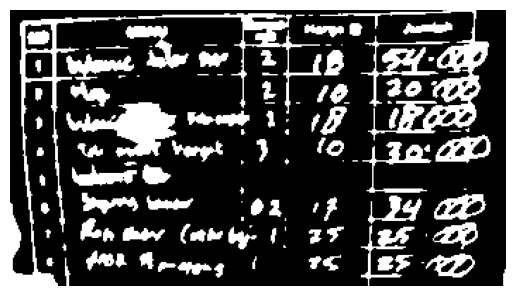

In [48]:
import cv2
import numpy as np
import pytesseract
from pytesseract import Output

def extract_information_from_bill(image_path):
    def preprocess_image(img_path):
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
        return thresh

    def detect_text_regions(image):
        data = pytesseract.image_to_data(image, output_type=Output.DICT)
        n_boxes = len(data['level'])
        for i in range(n_boxes):
            if int(data['conf'][i]) > 60:  
                (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        return image

    def detect_horizontal_lines(image):
        edges = cv2.Canny(image, 50, 150, apertureSize=3)
        lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)
        horizontal_lines = []
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                if abs(y2 - y1) < 10: 
                    horizontal_lines.append((y1, y2))
        return horizontal_lines

    img = preprocess_image(image_path)
    detect_text_regions(img)  
    lines = detect_horizontal_lines(img)

    print(lines)
    return img

# Example usage
image_path = 'receipts/ch-1.png'
image = cv2.imread(image_path)

# Pass the image data directly
cropped_image = extract_information_from_bill(image_path)
# Convert BGR (OpenCV format) to RGB (Matplotlib format)
cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

# Display the cropped image using matplotlib
plt.imshow(cropped_image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()
